# Exploring Curiosity Landing Site   

## How to get data

If you are on Linux use the script `download_curiosity_data.sh` from `tools` folder, it uses `wget`. It will create folder `curiosity_landing_site` and download 2 images from hirise-pds.lpl.arizona.edu website.

Simply run from project root folder, as follows:

In [1]:
!tools/download_curiosity_data.sh

Creating folder...
--2019-04-15 05:06:10--  https://hirise-pds.lpl.arizona.edu/PDS/EDR/ESP/ORB_028200_028299/ESP_028269_1755/ESP_028269_1755_RED1_1.IMG
Resolving hirise-pds.lpl.arizona.edu (hirise-pds.lpl.arizona.edu)... 128.196.250.179, 2607:f088:0:2::2a
Connecting to hirise-pds.lpl.arizona.edu (hirise-pds.lpl.arizona.edu)|128.196.250.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121897756 (116M) [application/octet-stream]
Saving to: ‘./curiosity_landing_site/ESP_028269_1755_RED1_1.IMG’

9_1755_RED1_1.IMG     2%[                    ]   3,32M   583KB/s    eta 3m 2s  ^C


In [2]:
from PIL import ImageEnhance
import matplotlib.pyplot as plt
from extract_patches import extract_img

In [3]:
def imshow(img, title='', w=8, h=8):
    """Simple plotter.
    """
    plt.figure(figsize=(w, h))
    plt.title(title)
    plt.imshow(img)

In [4]:
# images
red1_1 = 'curiosity_landing_site/ESP_028269_1755_RED1_1.IMG'
red3_1 = 'curiosity_landing_site/ESP_028269_1755_RED3_1.IMG'

/home/taras/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2575: DecompressionBombWarning: Image size (117760000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


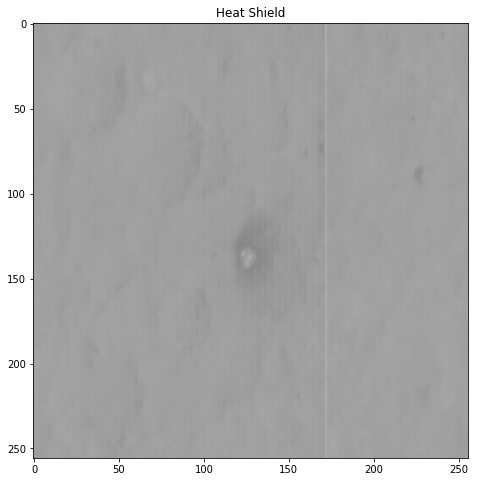

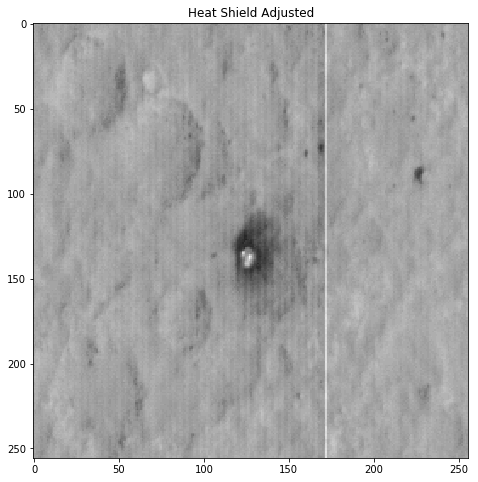

In [5]:
img = extract_img(red1_1)

# Coordinates of the Heat Shield:
xmin = 600
ymin = 60416
xmax = xmin + 256
ymax = ymin + 256

img = img.crop((xmin, ymin, xmax, ymax))
imshow(img, title='Heat Shield')
img.save('curiosity_landing_site/heat_shield_raw.png')

# Let's increase the contrast
enhancer = ImageEnhance.Contrast(img)
factor = 5.0
img = enhancer.enhance(factor)
imshow(img, title='Heat Shield Adjusted')
img.save('curiosity_landing_site/heat_shield_adj.png')

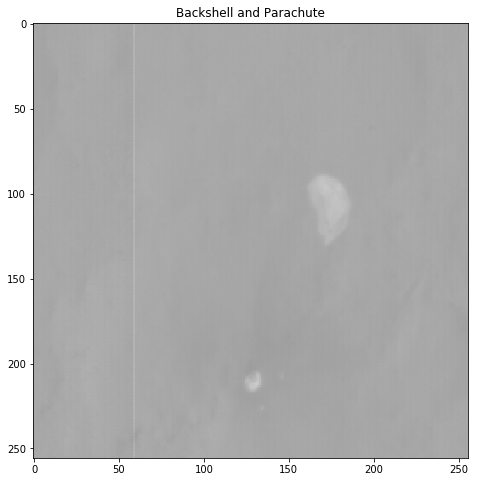

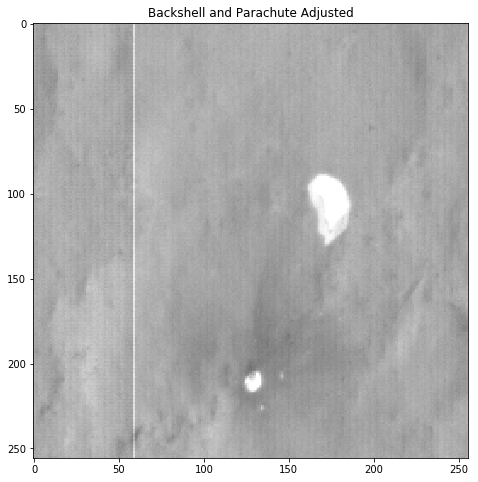

In [6]:
img = extract_img(red3_1)

# Coordinates of the Backshell and Parachute:
xmin = 450
ymin = 61250
xmax = xmin + 256
ymax = ymin + 256

img = img.crop((xmin, ymin, xmax, ymax))
imshow(img, title='Backshell and Parachute')
img.save('curiosity_landing_site/backshell_parachute_raw.png')

# Let's increase contrast
enhancer = ImageEnhance.Contrast(img)
factor = 5.0
img = enhancer.enhance(factor)
imshow(img, title='Backshell and Parachute Adjusted')
img.save('curiosity_landing_site/backshell_parachute_adj.png')

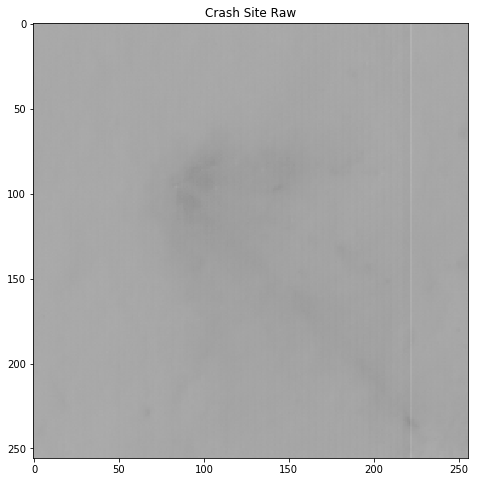

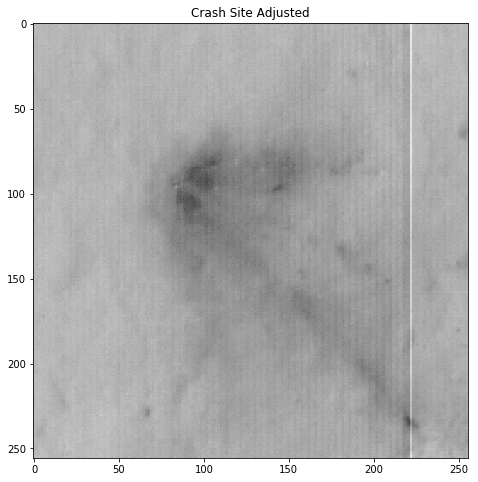

In [7]:
img = extract_img(red3_1)

# Coordinates of the Crash Site:
xmin = 550
ymin = 62464
xmax = xmin + 256
ymax = ymin + 256

img = img.crop((xmin, ymin, xmax, ymax))
imshow(img, title='Crash Site Raw')
img.save('curiosity_landing_site/crash_site_raw.png')

# Let's increase contrast
enhancer = ImageEnhance.Contrast(img)
factor = 5.0
img = enhancer.enhance(factor)
imshow(img, title='Crash Site Adjusted')
img.save('curiosity_landing_site/crash_site_adj.png')

# WE NEED TO THINK ABOUT IMAGE PREPROCESSING!!! LIKE CONTRAST, BRIGHTNESS...